In [364]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [375]:
df = pd.read_csv('./proj-yeardream_filtered3.csv')
df.columns

Index(['Unnamed: 0', '거래ID', '유형', '고객ID', '코스ID', '사이트', '포맷', '카테고리', '코스이름',
       '거래일자', '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액', '연',
       '월', '일', '시'],
      dtype='object')

In [379]:
df_payment = df[df['유형'] == 'PAYMENT']
df_payment.head()

,Unnamed: 0,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,...,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,...,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,...,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,...,549000,CARD,549000,0,549000,0,2022,12,31,23
3,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,...,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,...,239000,CARD,239000,0,239000,0,2022,12,31,23


In [377]:
df_payment_coupon = df_payment[df_payment['쿠폰할인액'] > 0]

coupon_count = df_payment_coupon['카테고리'].value_counts()
pay_count = df_payment['카테고리'].value_counts()
pay_count
type(coupon_count)

pandas.core.series.Series

In [380]:
df_category = pd.DataFrame({'쿠폰사용구매건': coupon_count, '일반구매건': pay_count,
                            '합계': coupon_count+pay_count, '쿠폰비중': coupon_count/pay_count,
                            '일반비중': 1-(coupon_count/pay_count)})
df_category

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
데이터 사이언스,12433,24867,37300,0.499980,0.500020
디자인,4928,9396,14324,0.524479,0.475521
마케팅,5907,12023,17930,0.491308,0.508692
부동산/금융,4441,10143,14584,0.437839,0.562161
부업/창업,674,1018,1692,0.662083,0.337917
업무 생산성,6393,13052,19445,0.489810,0.510190
영상/3D,6360,12981,19341,0.489947,0.510053
일러스트,8318,14258,22576,0.583392,0.416608
투자/재테크,1509,2348,3857,0.642675,0.357325
프로그래밍,25394,47923,73317,0.529892,0.470108


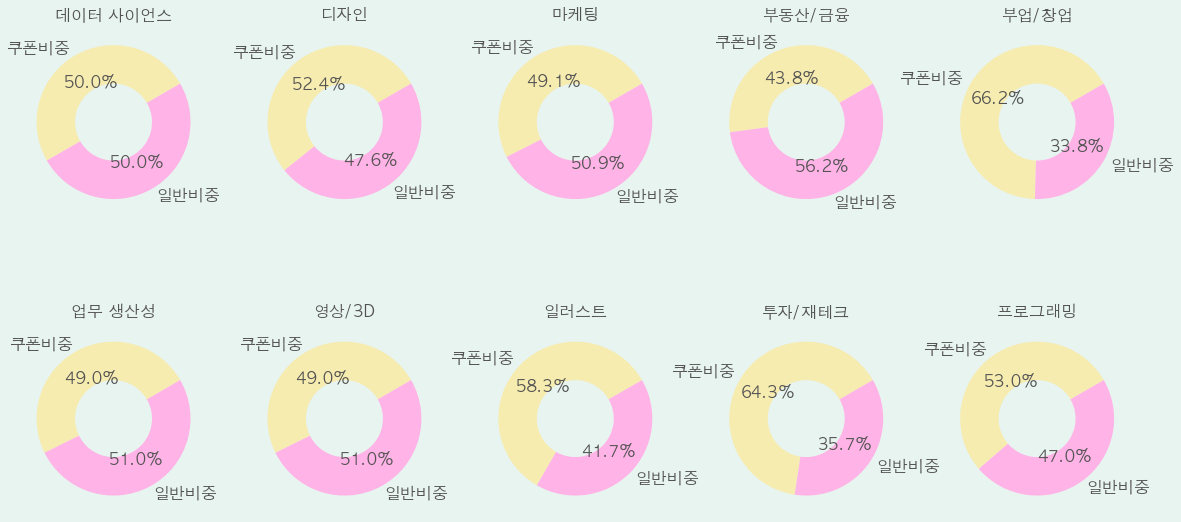

In [386]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
count = 0

fig, axs = plt.subplots(2, 5, figsize=(20, 10), facecolor='#e8f4f0')

for i in range(0,2):
    for j in range(0,5):
        axs[i,j].pie(df_category[['쿠폰비중', '일반비중']].iloc[count],
                    labels=df_category.columns[3:5], autopct='%2.1f%%',
                    colors=colors, startangle=30, wedgeprops=dict(width=.5),
                    textprops={'color':font_color})
        axs[i,j].set_title(df_category.index[count], fontsize=16, color=font_color)
        mpl.rcParams['font.size'] = 16.0
        count += 1

In [382]:
df_category_sum = pd.DataFrame({'쿠폰사용구매건': coupon_count.sum(), '일반구매건': pay_count.sum(),
                            '합계': coupon_count.sum()+pay_count.sum(), '쿠폰비중': coupon_count.sum()/pay_count.sum(),
                            '일반비중': 1-(coupon_count.sum()/pay_count.sum())}, index=['합계'])
df_category_sum

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
합계,76357,148009,224366,0.515894,0.484106


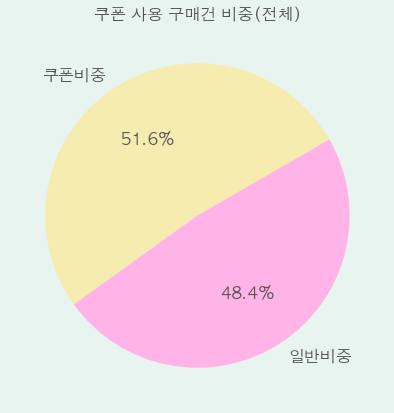

In [384]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
ax.pie(df_category_sum[['쿠폰비중', '일반비중']].iloc[0], labels=df_category_sum.columns[3:5], autopct='%2.1f%%', colors=colors, startangle=30, textprops={'color':font_color})
# Set title, its position, and font size
title = plt.title("쿠폰 사용 구매건 비중(전체)", fontsize=16, color=font_color)
# mpl.rcParams['font.size'] = 16.0

In [ ]:
### Nested pie chart